In [1]:
import math
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np
import cv2

from albumentations import (RandomBrightnessContrast, ShiftScaleRotate, Compose)


from random import seed
from random import uniform

from networks.dataset import get_loader
from networks.model import MyModel

import config as cfg

In [2]:
augmentation = Compose([
    RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=1.0),
    ShiftScaleRotate(
        shift_limit=0.05,
        scale_limit=0.1,
        rotate_limit=10,
        interpolation=cv2.INTER_LINEAR,
        border_mode=cv2.BORDER_CONSTANT,
        value=0.,
        p=1.0
    )
])

In [3]:
dataset_dir = cfg.setup['dataset_dir']
train_loader = get_loader(dataset_dir, 'train')

In [4]:
train_dataset = tf.data.Dataset.from_generator(train_loader, (tf.float32, tf.float32))
train_dataset = train_dataset.batch(cfg.setup['batch_size'])

(16, 256, 176, 1)
(256, 176, 1)
False


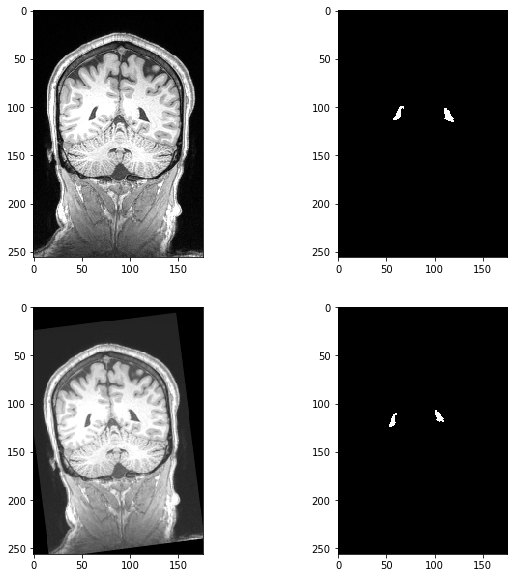

--- end image ---
(256, 176, 1)
False


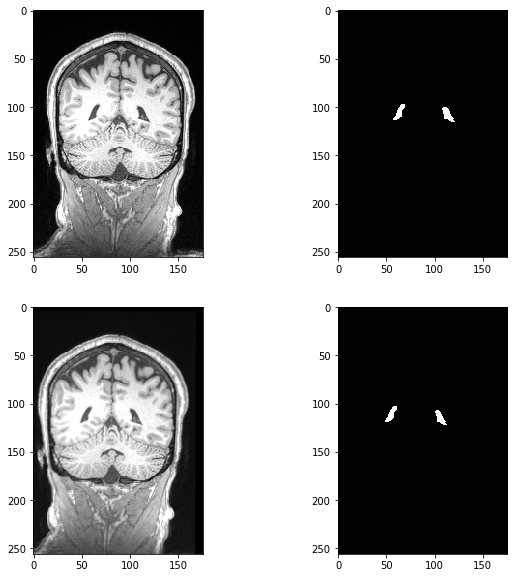

--- end image ---
(256, 176, 1)
False


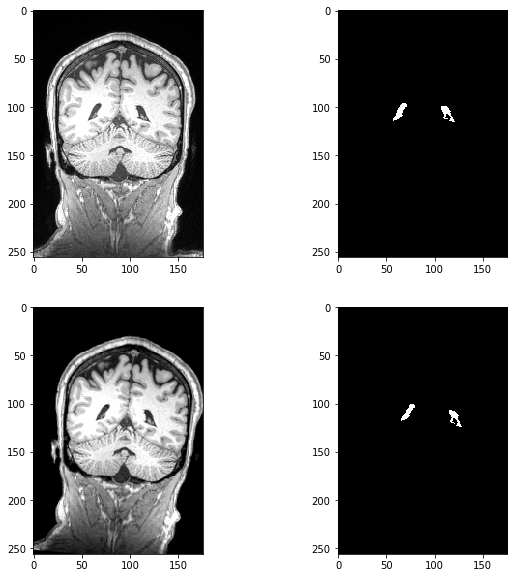

--- end image ---
(256, 176, 1)
False


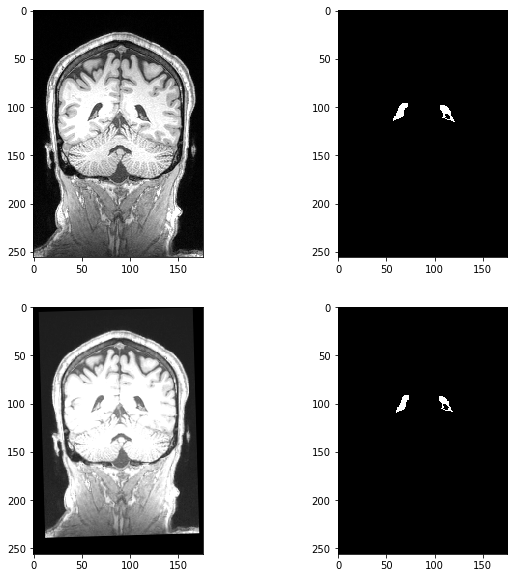

--- end image ---
(256, 176, 1)
False


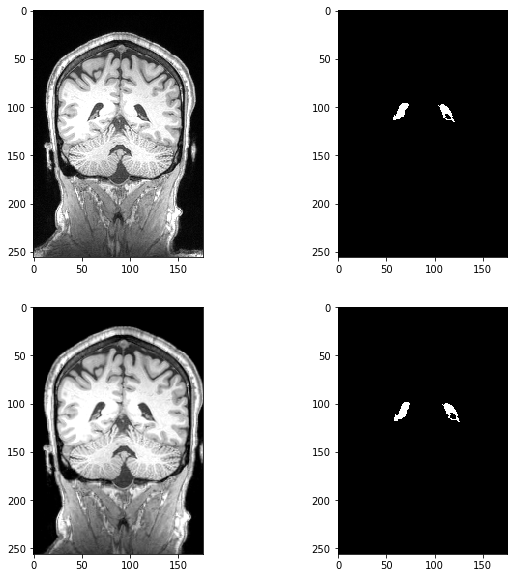

--- end image ---
(256, 176, 1)
False


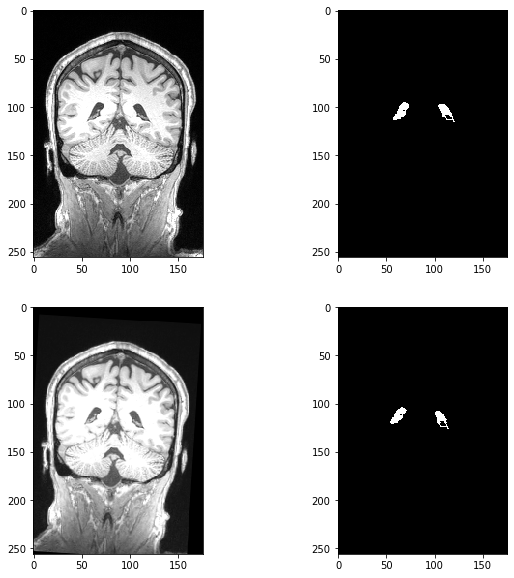

--- end image ---
(256, 176, 1)
False


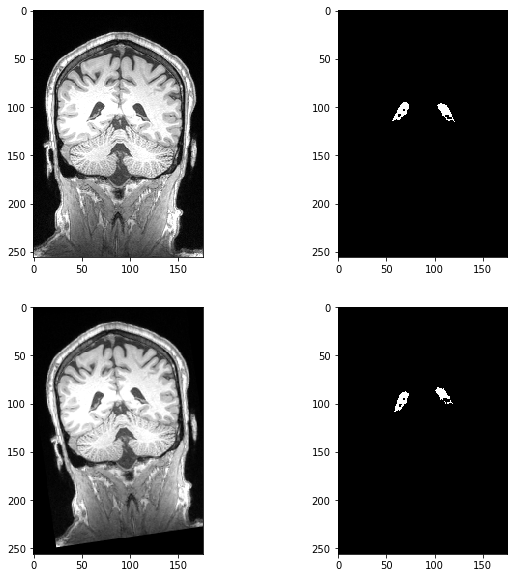

--- end image ---
(256, 176, 1)
False


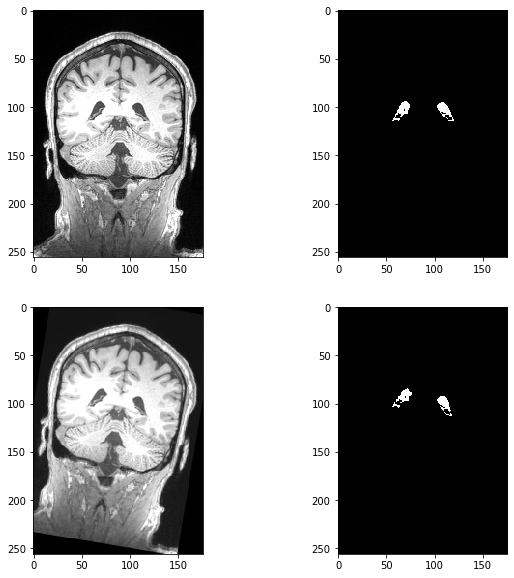

--- end image ---
(256, 176, 1)
False


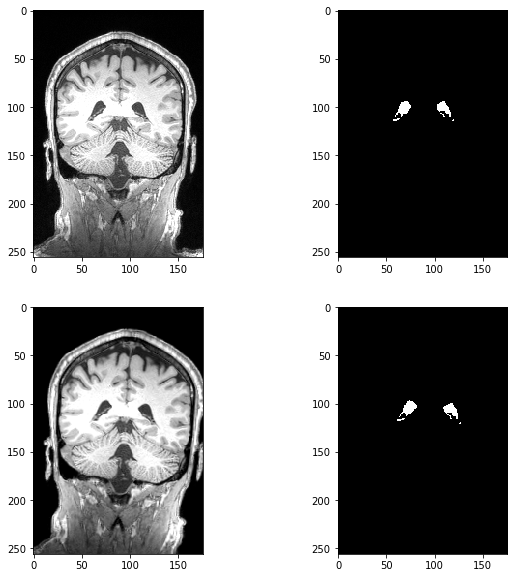

--- end image ---
(256, 176, 1)
False


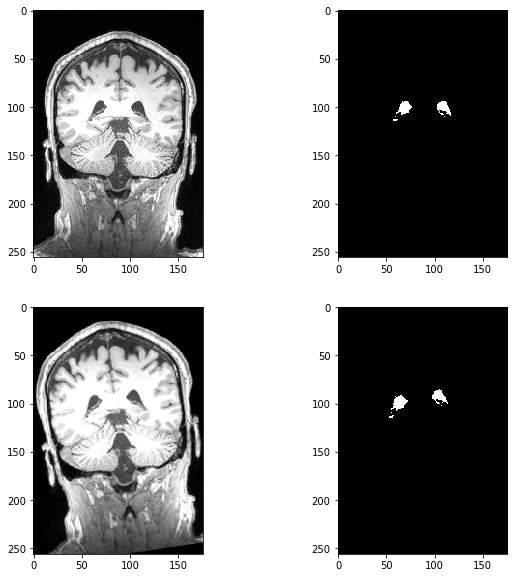

--- end image ---
(256, 176, 1)
False


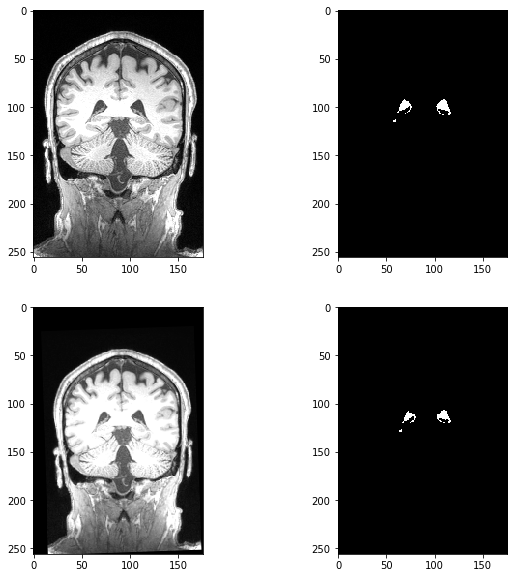

--- end image ---
(256, 176, 1)
False


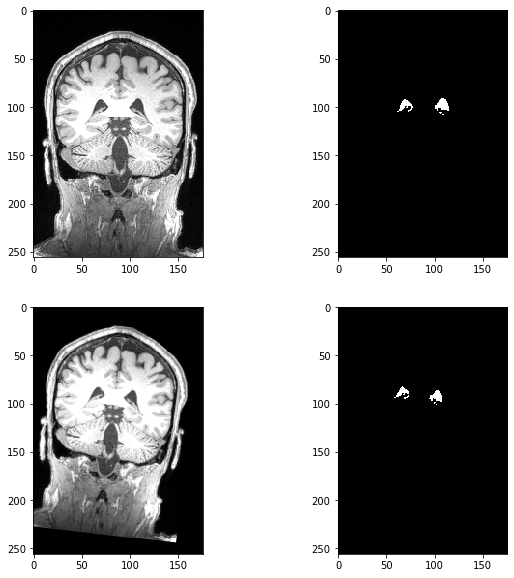

--- end image ---
(256, 176, 1)
False


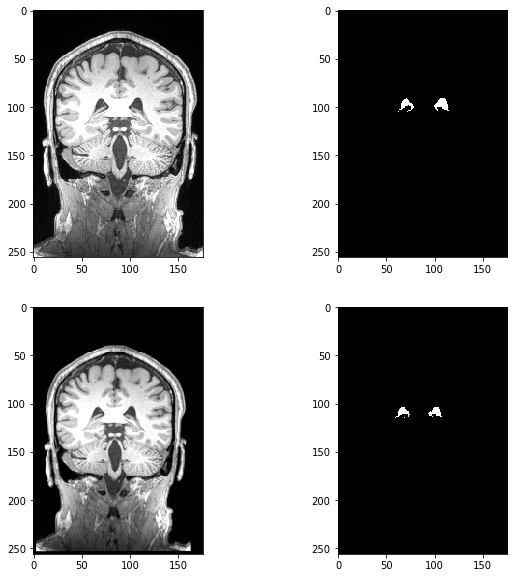

--- end image ---
(256, 176, 1)
False


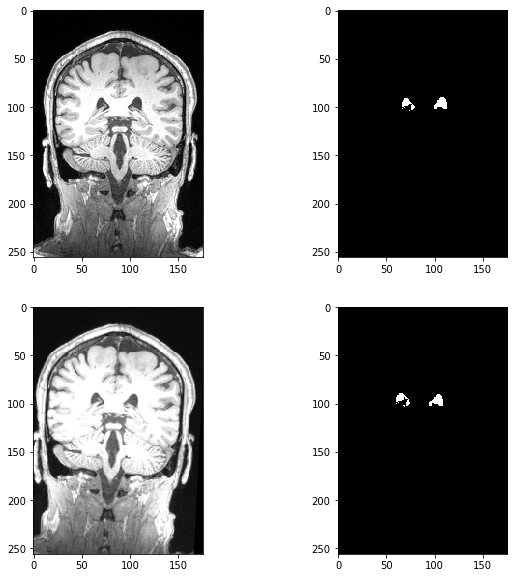

--- end image ---
(256, 176, 1)
False


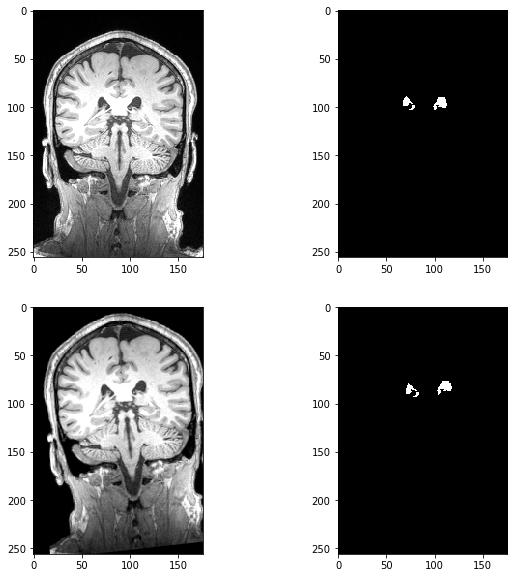

--- end image ---
(256, 176, 1)
False


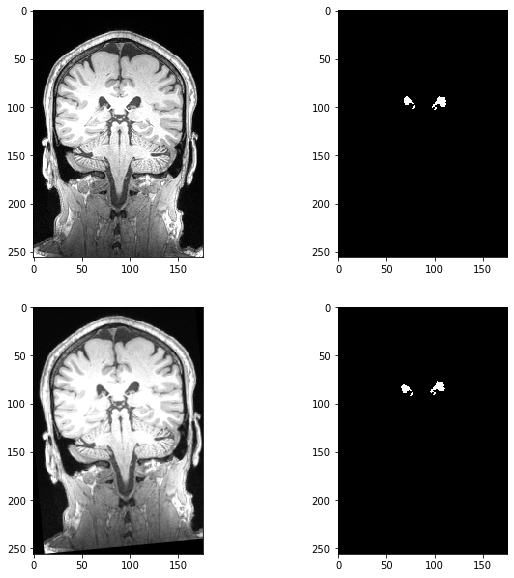

--- end image ---
--- end batch ---


In [5]:
for (images, labels) in train_dataset:
    print(images.shape)
    for image, label in zip(images, labels):
        print(image.shape)
        augmented = augmentation(image=image.numpy(), mask=label.numpy())
        
        f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10,10))

        ax1[0].imshow(image.numpy().squeeze(), cmap='gray')
        ax1[1].imshow(label.numpy().squeeze(), cmap='gray')
        ax2[0].imshow(augmented['image'].squeeze(), cmap='gray')
        ax2[1].imshow(augmented['mask'].squeeze(), cmap='gray')
        
        print(np.array_equal(label.numpy(), augmented['mask']))
        
        plt.show()
        
        print('--- end image ---')
    print('--- end batch ---')